In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_array = cv2.imread(r'C:\Users\Eskander\Documents\Marwadi projects\Driver monitoring system\project\Data_Set\Closed_Eyes\s0001_00001_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)

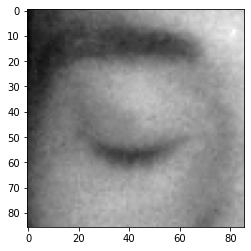

In [3]:
plt.imshow(img_array, cmap="gray")

In [4]:
img_array.shape

(86, 86)

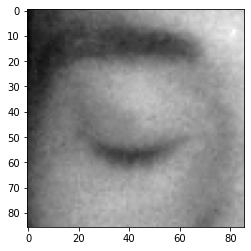

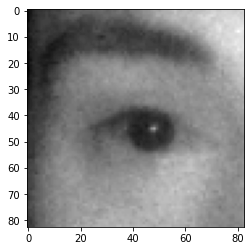

In [5]:
import os
Datadirectory = r'C:\Users\Eskander\Documents\Marwadi projects\Driver monitoring system\project\Data_Set'
Classes = ['Closed_Eyes', 'Open_Eyes']

for category in Classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
#break

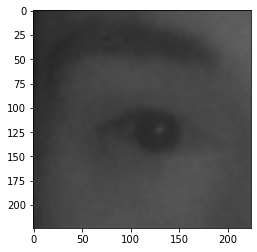

In [6]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [7]:
training_data = []

def create_training_data():
  for category in Classes:
      path = os.path.join(Datadirectory, category)
      class_num = Classes.index(category)
      for img in os.listdir(path):
        try :
           img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
           backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
           new_array = cv2.resize(backtorgb, (img_size,img_size))
           training_data.append([new_array, class_num])
        except Exception as e:
          pass

In [8]:
create_training_data()

In [9]:
print(len(training_data))

4000


In [10]:
import random
random.shuffle(training_data)

In [11]:
X = []
y = []
for features, label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [12]:
X = X/255.0

In [13]:
Y = np.array(y)

In [14]:
#pip install keras==2.6

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
model = tf.keras.applications.mobilenet.MobileNet()

In [17]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [18]:
base_input = model.layers[0].input

In [19]:
base_output = model.layers[-4].output

In [20]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [21]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [22]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [23]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [25]:
new_model.fit(X,Y, validation_split = 0.1,epochs = 3 )

Epoch 1/3
113/113 [==============================] - 269s 2s/step - loss: 5.2584e-06 - accuracy: 1.0000 - val_loss: 1.9810e-07 - val_accuracy: 1.0000
Epoch 2/3
113/113 [==============================] - 249s 2s/step - loss: 2.8226e-06 - accuracy: 1.0000 - val_loss: 2.0276e-07 - val_accuracy: 1.0000
Epoch 3/3
113/113 [==============================] - 250s 2s/step - loss: 1.1768e-06 - accuracy: 1.0000 - val_loss: 2.7162e-07 - val_accuracy: 1.0000


In [26]:
new_model.save('my_model.h5')